# Fashion MNIST Image Classification using TensorFlow

## Project Overview
This project demonstrates how to build, train, and evaluate a **neural network model** using **TensorFlow and Keras** to classify images from the **Fashion MNIST dataset**. The Fashion MNIST dataset is a collection of 70,000 grayscale images of 10 different clothing categories such as shirts, shoes, and bags. Each image is 28×28 pixels in size.

The goal of this project is to develop a machine learning model that can automatically recognize and classify clothing items based on their pixel patterns. It provides a foundation for understanding how image classification works using deep learning.


## Objectives
- Load and explore the Fashion MNIST dataset  
- Preprocess and normalize image data  
- Build and train a neural network using TensorFlow’s Keras API  
- Evaluate model performance on test data  
- Visualize predictions and improve model accuracy using callbacks  


## Tools and Libraries
- **Python** — programming language  
- **TensorFlow / Keras** — for building and training the neural network  
- **NumPy** — for numerical operations  
- **Matplotlib** — for data visualization  


## Expected Outcome
After training, the model should be able to accurately classify images of clothing with around **90% accuracy**. This project also demonstrates the use of **callbacks** to stop training automatically once the model reaches a predefined accuracy threshold.


## Key Learning Points
- Basic structure of a neural network (input, hidden, and output layers)  
- Activation functions (`ReLU`, `Softmax`)  
- Data normalization and its impact on performance  
- Implementing custom callbacks in TensorFlow  


*This notebook is part of a portfolio project to showcase practical skills in deep learning and TensorFlow for image recognition tasks.*

## Import TensorFlow Library

The first step is to import **TensorFlow**, an open-source deep learning framework developed by Google.  
TensorFlow provides powerful tools for building and training machine learning and neural network models.  
In this project, it will be used to create and train a neural network that classifies images from the Fashion MNIST dataset.


In [6]:
import tensorflow as tf

In [7]:
# check TensorFlow version  
print(tf.__version__)

2.20.0


## Load the Fashion MNIST Dataset

TensorFlow includes several built-in datasets through its **Keras API**, and one of them is the **Fashion MNIST dataset**.  
This dataset consists of **70,000 grayscale images** (28×28 pixels) of various clothing items, split into **60,000 training images** and **10,000 test images**.

| Label | Category      |
| :---: | :------------ |
|   0   | T-shirt / Top |
|   1   | Trouser       |
|   2   | Pullover      |
|   3   | Dress         |
|   4   | Coat          |
|   5   | Sandal        |
|   6   | Shirt         |
|   7   | Sneaker       |
|   8   | Bag           |
|   9   | Ankle Boot    |



In [8]:
fmnist = tf.keras.datasets.fashion_mnist

## Split the Dataset into Training and Testing Sets

The Fashion MNIST dataset is divided into two main parts — one for **training the model** and another for **testing its performance**.  
We can load both parts using the `.load_data()` method from TensorFlow.


In [9]:
(training_images, training_labels),(test_images, test_labels) = fmnist.load_data()

In [10]:
 #check shape of training images
training_images.shape

(60000, 28, 28)

In [11]:
#check shape of training labels 
training_labels.shape

(60000,)

In [12]:
#check shape of testing images
test_images.shape

(10000, 28, 28)

In [13]:
#check shape of testing labels
test_labels.shape

(10000,)

## Explore and Visualize the Dataset

Before training the model, it’s important to **explore** the dataset to understand what the images and labels look like.  
Here, we use **NumPy** and **Matplotlib** to inspect and visualize sample images.


LABEL: 9

 IMAGE PIXEY ARRAY:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

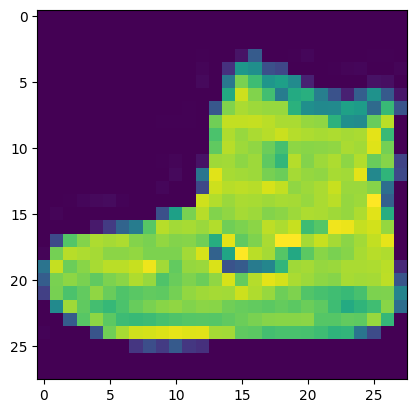

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

# Set number Of characters per row when printing 
np.set_printoptions(linewidth=320) 

#Print the label and image with index 0 (first training image)
print(f'LABEL: {training_labels[0]}') 
print(f'\n IMAGE PIXEY ARRAY:{training_images[0]}')

# Visualize this first training image 
plt.imshow(training_images[0]) 

It can be seen that the image with label 9 is ankle boot.

## Data Normalization

Before feeding the image data into the neural network, it’s essential to **normalize** the pixel values.  
Each image in the Fashion MNIST dataset contains pixel intensity values ranging from **0 to 255**.  
By dividing these values by 255, we scale them into a range between **0 and 1**, which helps the model train more efficiently.

In [15]:
#Normal the pixel value of train and test images

training_images = training_images/255
test_images = test_images/255

In [16]:
#check the normalized data
training_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        

## Build the Neural Network Model

Now that the data is ready, we can build a **neural network** for image classification using TensorFlow’s **Keras Sequential API**.  
A Sequential model allows layers to be stacked one after another to form a deep learning pipeline.

Flatten() Layer  
Converts each 28×28 pixel image (2D array) into a 1D array of 784 pixels.  
This prepares the data for the fully connected (Dense) layers.

Dense(128, activation='relu') Layer  
A fully connected layer with 128 neurons.  
Uses the ReLU (Rectified Linear Unit) activation function to introduce non-linearity, enabling the model to learn complex patterns.

Dense(10, activation='softmax') Layer  
The output layer with 10 neurons, one for each clothing category.  
Uses Softmax activation to output probability values for each class, ensuring all probabilities sum to 1.

In [17]:
#build the classification model (neural network)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)]
                                  )

## Compile and Train the Model

After building the neural network, the next step is to **compile** and **train** it. Compilation configures how the model learns from the data.

compile()  
Optimizer: Adam - an efficient optimization algorithm that adjusts weights during training to minimize the loss.  
Loss function: sparse_categorical_crossentropy - used for multi-class classification when labels are integers (0–9).  
Metrics: accuracy - tracks the proportion of correctly predicted labels during training.  

fit()  
Trains the model on the training images and labels.  
epochs=5 means the model will iterate 5 times over the training dataset.  
During training, the model updates its weights to minimize the loss and improve accuracy.  

After this step, the neural network learns patterns in the clothing images and can start making predictions.

In [18]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images,training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8241 - loss: 0.5024
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8637 - loss: 0.3754
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8754 - loss: 0.3358
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8854 - loss: 0.3128
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8907 - loss: 0.2956


After training for 5 times (epochs), the model with the accuracy 0.89 and loss 0.29 is obtained.

## Evaluate the Model on Test Data

After training, we need to check how well the model performs on **unseen data**.  
This step measures the model’s ability to **generalize** beyond the training dataset.


In [19]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8726 - loss: 0.3591


[0.3590989112854004, 0.8726000189781189]

## Make Predictions on Test Images

Once the model is trained, we can use it to **predict the labels** of new images from the test dataset.

In [23]:
#predict the label of test images using the trained model
classification = model.predict(test_images)


#check the classification result of fifth image in test dataset
print(classification[4]) 
print(np.argmax(classification[4])) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.4521839e-01 1.8541022e-06 4.4982754e-02 8.2548213e-04 8.1366254e-03 3.1364357e-06 6.0026795e-01 5.8336880e-08 5.6340522e-04 2.4767377e-07]
6


## Understanding the Prediction Output

After predicting the label for a test image, the model outputs a **probability distribution** over all 10 classes.

Example output for the fifth test image:
[3.4521839e-01 1.8541022e-06 4.4982754e-02 8.2548213e-04 8.1366254e-03 3.1364357e-06 6.0026795e-01 5.8336880e-08 5.6340522e-04 2.4767377e-07]

### Explanation
- Each number represents the **model’s confidence** that the image belongs to a particular class (0–9).  
- Values are probabilities between 0 and 1, and the sum of all probabilities is **1**.  
- For this example:
  - The highest probability is **0.9883** at **index 6**, meaning the model predicts the image as **class 6 (Shirt)**.  
  - `np.argmax(classification[4])` returns **6**, which seems consistent with the probabilities. 

### Key Takeaways
- The model gives **confidence scores** for all classes.  
- The **predicted label** is the class with the **highest probability**.  
- Even if probabilities are low for other classes, the **largest probability** determines the predicted category.


In [25]:
#check the true label of fifth image in test dataset
print(test_labels[4])

6


It returns 6, meaning the result of the trained model is correct. 

## Early Stopping with a Custom Callback

To make training more efficient, we can use a **custom callback** to stop training once the model reaches a desired accuracy. This prevents unnecessary epochs once the model has already learned the patterns in the data.

## Explanation of the Custom Callback

- **`tf.keras.callbacks.Callback`**: A base class that allows custom actions to be executed at different stages of training.  

- **`on_epoch_end()`**: This method is called automatically at the end of each epoch during training.  

- **Early Stopping Condition**: If the **training accuracy exceeds 90%**, the callback stops the training early. This saves **time** and **computational resources**.  

- **Additional Notes**:  
  - The image data is normalized again to scale pixel values between 0 and 1.  
  - The model architecture remains the same as before.  
  - Training is set to run for up to 15 epochs, but will **stop early** once the accuracy threshold is reached.  

**Benefit**: This technique ensures **efficient training** without overfitting or unnecessary computation.



In [22]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callabacks = myCallBack()
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = fmnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation=tf.nn.softmax)]
                                  )
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])   
model.fit(training_images,training_labels, epochs=15, callbacks=[callabacks])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8243 - loss: 0.5005
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8648 - loss: 0.3723
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8771 - loss: 0.3359
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8850 - loss: 0.3120
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8908 - loss: 0.2933
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8968 - loss: 0.2789
Epoch 7/15
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8997 - loss: 0.2666
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9015 - loss: 0.2654


- The model improved steadily with each epoch, as indicated by **increasing accuracy** and **decreasing loss**.  
- The **custom callback** successfully stopped training once the desired **90% accuracy** threshold was reached, preventing unnecessary computation.  
- Final accuracy > 90% shows the model is performing **well on the training data**, indicating effective learning.